In [61]:
import subprocess

In [66]:
compile_cmd = "gcc -o test_wabering main.c wabering.c -lm"
compile_waber_cmd = "gcc -shared -o libwabering.so wabering.c -lm"
run_cmd = "./test_wabering > test_wabering_output"

subprocess.run(compile_cmd, shell=True)
subprocess.run(compile_waber_cmd, shell=True)
subprocess.run(run_cmd, shell=True)

CompletedProcess(args='./test_wabering > test_wabering_output', returncode=0)

In [67]:
import ctypes

class cfg(ctypes.Structure):
    _fields_ = [
        ("phase", ctypes.c_float),
        ("depth", ctypes.c_float),
        ("frequency", ctypes.c_float),
        ("brightness", ctypes.c_float),
        ("smoothness", ctypes.c_float),
    ]

# Load the shared library
if ctypes.sizeof(ctypes.c_voidp) == 4:
    libwabering = ctypes.CDLL('./libwabering.so')  # On 32-bit systems
else:
    libwabering = ctypes.CDLL('./libwabering.so')  # On 64-bit systems

# Specify the argument and return types of the function
libwabering._compressor.argtypes = (ctypes.c_float, ctypes.c_float)
libwabering._compressor.restype = ctypes.c_float

libwabering._waber.argtypes = (ctypes.c_float, (ctypes.POINTER(cfg)))
libwabering._waber.restype = ctypes.c_float

# Call the function
result = libwabering._compressor(0.5, 10)
print("Result:", result)

_cfg = cfg(0, 1, 1, 1, 1)

result = libwabering._waber(1, ctypes.byref(_cfg))
print("Result:", result)

Result: 0.006692851427942514
Result: 0.3775407075881958


In [68]:
compressorfunc_output = []
sinefunc_output = []
compressed_sine_output = []
waberfunc_float_output = []
waberfunc_int_output = []

with open('test_wabering_output', 'r') as f:
    lines = f.readlines()

for line in lines:
    if "Testing Compressorfunc:" in line:
        flist = compressorfunc_output
    elif "Testing Sinefunc:" in line:
        flist = sinefunc_output
    elif "Testing Compressed Sine:" in line:
        flist = compressed_sine_output
    elif "Testing Waberfunc Float:" in line:
        flist = waberfunc_float_output
    elif "Testing Waberfunc Int:" in line:
        flist = waberfunc_int_output
    else:
        flist.append(float(line.strip().split(',')[1]))


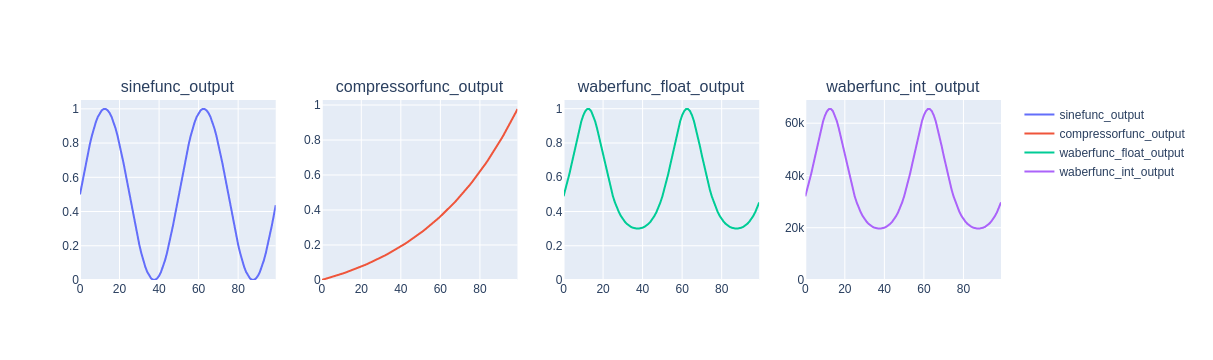

In [69]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

bms_traces = [
  go.Scatter(y=sinefunc_output, mode="lines", name="sinefunc_output"),
  go.Scatter(y=compressorfunc_output, mode="lines", name="compressorfunc_output"),
  go.Scatter(y=waberfunc_float_output, mode="lines", name="waberfunc_float_output"),
  go.Scatter(y=waberfunc_int_output, mode="lines", name="waberfunc_int_output"),
]

fig = make_subplots(rows=1, cols=4, subplot_titles=["sinefunc_output", "compressorfunc_output", "waberfunc_float_output", "waberfunc_int_output"])

for idx, bms_trace in enumerate(bms_traces):  # see example above
	fig.add_trace(bms_trace, row=1, col=idx+1)

#fig.update_layout(
#  title='Test Output', 
  #yaxis=dict(title='return')
#)
fig.update_yaxes(rangemode="tozero") 
fig.show()